<a href="https://colab.research.google.com/github/sushrutha777/Bulldozer-Price-Prediction/blob/main/ModelTraininig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available
print(torch.cuda.get_device_name(0))  # Prints the GPU name if available

True
Tesla T4


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv')

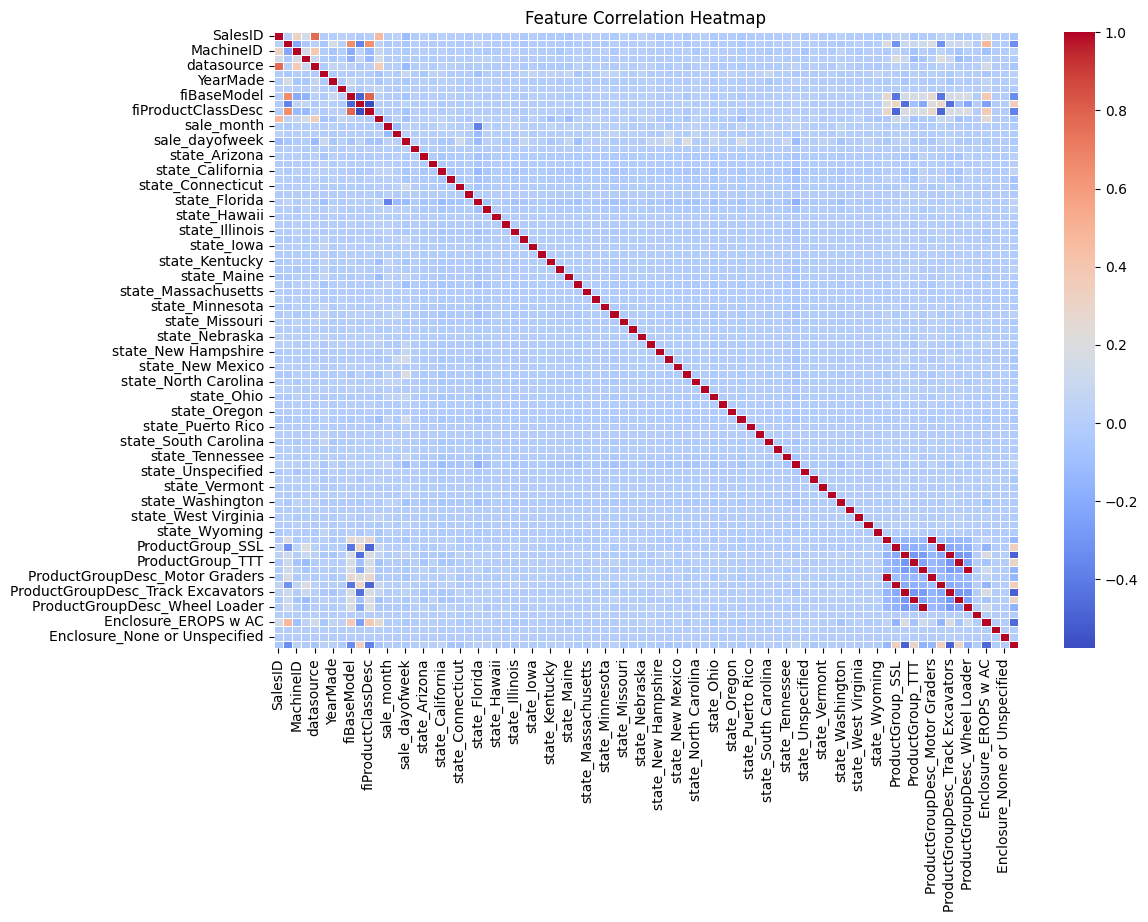

In [5]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [7]:
X

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiBaseModel,ProductSize,fiProductClassDesc,...,ProductGroupDesc_Motor Graders,ProductGroupDesc_Skid Steer Loaders,ProductGroupDesc_Track Excavators,ProductGroupDesc_Track Type Tractors,ProductGroupDesc_Wheel Loader,Enclosure_EROPS AC,Enclosure_EROPS w AC,Enclosure_NO ROPS,Enclosure_None or Unspecified,Enclosure_OROPS
0,1139246,999089,3157,121,3,2004,68,23557,4,36143,...,0,0,0,0,1,0,1,0,0,0
1,1139248,117657,77,121,3,1996,4640,46666,2,41176,...,0,0,0,0,1,0,1,0,0,0
2,1139249,434808,7009,121,3,2001,2838,12863,4,9797,...,0,1,0,0,0,0,0,0,0,1
3,1139251,1026470,332,121,3,2001,3486,30741,3,31291,...,0,0,1,0,0,0,1,0,0,0
4,1139253,1057373,17311,121,3,2007,722,11132,4,10089,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,1919201,21435,149,2,2005,0,23557,3,11474,...,0,0,1,0,0,0,0,0,0,0
412694,6333345,1882122,21436,149,2,2005,0,23557,3,13755,...,0,0,1,0,0,0,0,0,0,0
412695,6333347,1944213,21435,149,2,2005,0,23557,3,11474,...,0,0,1,0,0,0,0,0,0,0
412696,6333348,1794518,21435,149,2,2006,0,23557,3,11474,...,0,0,1,0,0,0,0,0,0,0


In [8]:
y

,SalePrice
0,66000.0
1,57000.0
2,10000.0
3,38500.0
4,11000.0
...,...
412693,10000.0
412694,10500.0
412695,12500.0
412696,10000.0


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

In [10]:
y_train.shape

(330158,)

In [11]:
X_test.shape

(82540, 81)

In [12]:
y_test.shape

(82540,)

## Model Training

In [13]:
pip install xgboost

In [14]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [15]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=50, max_depth=10),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=50),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=50, max_depth=5),
    "XGBoost Regressor": XGBRegressor(n_estimators=50, max_depth=5),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 15438.0228
- Mean Absolute Error: 10928.9606
- R2 Score: 0.5558
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15362.1493
- Mean Absolute Error: 10909.0833
- R2 Score: 0.5560


Lasso
Model performance for Training set
- Root Mean Squared Error: 15438.7587
- Mean Absolute Error: 10928.1701
- R2 Score: 0.5558
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15362.5355
- Mean Absolute Error: 10907.9091
- R2 Score: 0.5559




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.55071e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge
Model performance for Training set
- Root Mean Squared Error: 15438.0280
- Mean Absolute Error: 10928.9616
- R2 Score: 0.5558
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15362.1160
- Mean Absolute Error: 10909.0061
- R2 Score: 0.5560


ElasticNet
Model performance for Training set
- Root Mean Squared Error: 15967.8576
- Mean Absolute Error: 11243.5358
- R2 Score: 0.5248
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15875.3012
- Mean Absolute Error: 11212.7496
- R2 Score: 0.5258


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9946.0930
- Mean Absolute Error: 5939.1951
- R2 Score: 0.8139


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 9697.8184
- Mean Absolute Error: 6285.

## Hyper parameter Tuning

In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the dictionary
model_param = {}

# Define XGBoost parameter grid
xg_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'gamma': [0, 0.1, 0.3],
}

# Define model list
randomcv_models = [
    ('XGBoost', XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist'), xg_params),
]

# Run RandomizedSearchCV
for model_name, model, params in randomcv_models:
    print(f"Running RandomizedSearchCV for {model_name}...")

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=5,
        cv=2,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    # ✅ Store best parameters correctly
    model_param[model_name] = random_search.best_params_

    # ✅ Print best parameters correctly
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Running RandomizedSearchCV for XGBoost...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
---------------- Best Params for XGBoost -------------------
{'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7}


In [23]:
best_xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    subsample=0.9,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    gamma=0.3,
    colsample_bytree=0.7
)
best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the model
best_xgb.fit(X_train, y_train)

# Make predictions
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Define evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluate on training data
train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)

# Evaluate on test data
test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

# Display results
print(f"{'='*15} XGBoost Model Evaluation {'='*15}")

print("\n📌 Model Performance on Training Set:")
print(f"- RMSE: {train_rmse:.4f}")
print(f"- MAE: {train_mae:.4f}")
print(f"- R² Score: {train_r2:.4f}")

print("\n📌 Model Performance on Test Set:")
print(f"- RMSE: {test_rmse:.4f}")
print(f"- MAE: {test_mae:.4f}")
print(f"- R² Score: {test_r2:.4f}")

print("="*50, "\n")

=============== XGBoost Model Evaluation ===============

📌 Model Performance on Training Set:
- RMSE: 9038.4479
- MAE: 5925.6274
- R² Score: 0.8477

📌 Model Performance on Test Set:
- RMSE: 9078.6301
- MAE: 5970.4974
- R² Score: 0.8449

